# Introduction

In the last notebook I created using CIFAR-10 I took a nonchalant approach to modeling CNN's and focusing primarily on understanding how CNN's worked. In this Notebook, I will be taking a more structured approach, following the applied machine learning process as . We will define our problem, clean and prepare our data, select a model, then fine tune. So glad for you to join today :)
Stages below:

    1) Defining our Problem
    
    2) Data Preparation
        a. Loading Data
        b. Data Visualization
        c. Splitting our Data
        d. Encoding
    
    3) Model Selection
        a. Build Model
        b. Train Model
        c. Fit Model
        d. Measure baseline Performance
    
    4) Improve Model
        a. Adding dropout to Baseline
        b. Using Data Augmentation on Baseline
        c. Data Augmentation and Dropout
        d. Data Augmentation, Dropout, and Hypertuning
    
    5) Present Results
        a. Conclusion
        b. lessons learned
    
***This notebook was completed using the following resources, helping me understand the machine learning process as well as learning how to build more accurate CNN models.***
- https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/
- https://www.kaggle.com/faizanurrahmann/cifar-10-object-classification-best-model
- https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/
- https://www.youtube.com/watch?v=WSvpLUietIM&ab_channel=deeplizard
***NO plagarism is intended or attempted, this notebook is for learning purposes and is not attempting to claim credit of any sort, the CIFAR-10 dataset has been long solved***




# 1. Defining our Problem

The CIFAR-10 dataset consists of 60,000 images of size 32x32. This dataset is split into 10 classes, making our problem a multi-image classificaiton problem. One should note that these images are quite small - meaning that we will have to take this into account when we tune our hyperparamters, this also effects the amount of layers we are able to have in our model since convolutional and pooling layers reduce the size of the image.
My assumption in a real world setting is that here one would discuss with their supervisor and team what the end goal is. My personal goal here is to achieve at least 90% classification accuracy on the test data.

# 2. Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num Physical Devices Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num Physical Devices Available:  1


In [3]:
tf.test.is_built_with_cuda()

True

***2.a) Loading Data***

Here we simply imported our data using an in line command, this splits our data into test and training samples, however we will also split the training data into training and validation data.

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [5]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

***2.b) Data Visualization***

In [6]:
def plot_img(sample): #  takes in sample number (0-50,000)
    
    figure(figsize=(2,4), dpi=60)
    plt.imshow(x_train[sample])
    plt.title(labels[y_train[sample,0]])
    print("Sample shape is:", x_train[sample].shape)

Sample shape is: (32, 32, 3)
Sample shape is: (32, 32, 3)


(None, None)

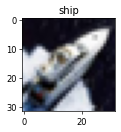

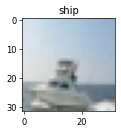

In [7]:
plot_img(20000), plot_img(100)

***2.c) Splitting and Encoding***

In [8]:
from keras.utils import to_categorical

Using TensorFlow backend.


Split into training and validation data

In [9]:
X_train, X_valid, Y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42) 

One hot encode our Y_train and y_valid

In [10]:
Y_train = to_categorical(Y_train)
y_valid = to_categorical(y_valid)
y_test= to_categorical(y_test)

As described in machinelearningmastery.com, we will need to normalize our pixel data (ie putting it on the interval of 0-1), moreover we need to set it to float type since dividing by 255 will certainly bring about decimals

In [11]:
X_train_norm = X_train.astype('float32')/255.0
X_val_norm = X_valid.astype('float32')/255.0
X_test_norm = x_test.astype('float32')/255.0

In [12]:
Y_train.shape

(40000, 10)

# 3. Baseline Model

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D
from keras.layers import MaxPool2D, Activation, MaxPooling2D
from keras.optimizers import Adam

***We will be picking up from our last notebook's model here, since we have achieved an 80% accuracy on our training data last time, we will be attempting to improve from there.***

In [14]:
base_model = Sequential([
    
    Conv2D(filters=128, 
           kernel_size=(3,3),  
           activation="relu", 
           input_shape=(32,32,3)),
    Conv2D(128, 3, activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    
    
    Conv2D(64, 3, activation="relu"),
    Conv2D(64, 3, activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    
    Flatten(),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
    
    
])

In [15]:
base_model.compile(loss="categorical_crossentropy",
                   optimizer=Adam(),
                   metrics=["accuracy"])

In [16]:
base_history = base_model.fit(x=X_train_norm,
                              y=Y_train,
                              epochs=11)
                              

Epoch 1/11
40000/40000 [==============================] - 40s 989us/step - loss: 1.5472 - accuracy: 0.4358
Epoch 2/11
40000/40000 [==============================] - 37s 922us/step - loss: 1.1028 - accuracy: 0.6102
Epoch 3/11
40000/40000 [==============================] - 37s 922us/step - loss: 0.9197 - accuracy: 0.6784
Epoch 4/11
40000/40000 [==============================] - 37s 932us/step - loss: 0.7906 - accuracy: 0.7236
Epoch 5/11
40000/40000 [==============================] - 37s 926us/step - loss: 0.7053 - accuracy: 0.7551
Epoch 6/11
40000/40000 [==============================] - 36s 888us/step - loss: 0.6289 - accuracy: 0.7800
Epoch 7/11
40000/40000 [==============================] - 35s 881us/step - loss: 0.5585 - accuracy: 0.8029
Epoch 8/11
40000/40000 [==============================] - 35s 863us/step - loss: 0.5045 - accuracy: 0.8228
Epoch 9/11
40000/40000 [==============================] - 34s 857us/step - loss: 0.4488 - accuracy: 0.8414
Epoch 10/11
40000/40000 [============

In [17]:
base_model.evaluate(x=X_test_norm, y=y_test)

10000/10000 [==============================] - 4s 373us/step


[1.0630502933502197, 0.7055000066757202]

In [18]:
def make_pred(model, number):
    prediction = model.predict(x=X_test_norm)
    figure(figsize=(2,4), dpi=60)
    plt.imshow(x_train[number])
    plt.title(labels[y_train[number,0]])
    
    print("Model thinks this sample is: ", labels[np.argmax(prediction[number])])  
    

Model thinks this sample is:  truck


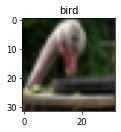

In [19]:
make_pred(base_model, 400)

***3.d) Baseline Performance***

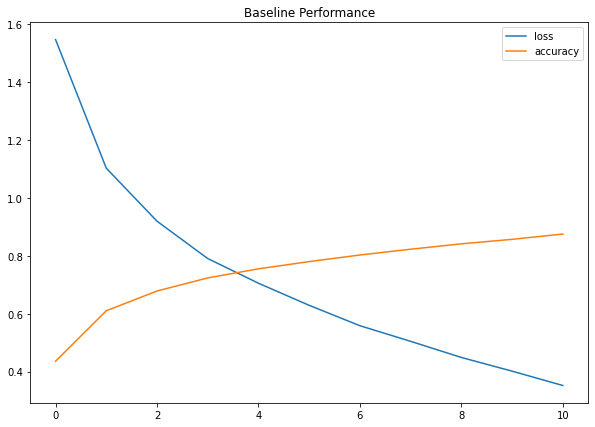

In [20]:
base_graph = pd.DataFrame(base_history.history).plot(figsize=(10,7), title="Baseline Performance")


In [21]:
base_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        73792     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)             

***Brief Discussion:*** here we have developed our baseline model that we will be test against. The baseline has an accuracy of 72% at 5 epochs. To save time and computational power we will continue using 5 epochs until we believe that our final model will be able to reach that 90% mark.

# 4. Model Improvements
***What can we learn about the machine learning process that can help us to make improvements?*** 

Some quick ideas:
- have better data (data augmentation, more training data, more validation data)
- adjust our model's hyperparameters
- research differnt model's that already exist and implement those
For model_0 we will utilize data augmentation to help reduce overfitting and try to spice up our data, we will also be looking at pre-existing model's and implement those architectures to our own model. We will also be tinkering with our hyperparameters.

***Quick findings:***
- we can add dropout

***4.a)***

In [22]:
dropout_model = Sequential([
    
    Conv2D(filters=128, 
           kernel_size=(3,3),  
           activation="relu", 
           input_shape=(32,32,3)),
    Conv2D(128, 3, activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    
    
    Conv2D(64, 3, activation="relu"),
    Conv2D(64, 3, activation="relu"),
    
    MaxPooling2D(pool_size=(2,2)),
    
    
    Flatten(),
    Dropout(0.5), #  new layer
    Dense(64, activation="relu"),
    
    Dense(10, activation="softmax")
    
    
])

In [23]:
dropout_model.compile(loss="categorical_crossentropy",
                      optimizer=Adam(),
                      metrics=["accuracy"])

In [24]:
history_dropout = dropout_model.fit(x=X_train_norm,
                                    y=Y_train,
                                    epochs=11,
                                    verbose=1)

Epoch 1/11
40000/40000 [==============================] - 36s 911us/step - loss: 1.6790 - accuracy: 0.3803
Epoch 2/11
40000/40000 [==============================] - 36s 909us/step - loss: 1.3067 - accuracy: 0.5293
Epoch 3/11
40000/40000 [==============================] - 36s 905us/step - loss: 1.1284 - accuracy: 0.6015
Epoch 4/11
40000/40000 [==============================] - 38s 956us/step - loss: 1.0147 - accuracy: 0.6419
Epoch 5/11
40000/40000 [==============================] - 36s 904us/step - loss: 0.9394 - accuracy: 0.6676
Epoch 6/11
40000/40000 [==============================] - 36s 893us/step - loss: 0.8704 - accuracy: 0.6939
Epoch 7/11
40000/40000 [==============================] - 37s 919us/step - loss: 0.8263 - accuracy: 0.7105
Epoch 8/11
40000/40000 [==============================] - 35s 882us/step - loss: 0.7905 - accuracy: 0.7215
Epoch 9/11
40000/40000 [==============================] - 35s 880us/step - loss: 0.7556 - accuracy: 0.7332
Epoch 10/11
40000/40000 [============

In [25]:
dropout_model.evaluate(x=X_test_norm, y=y_test)

10000/10000 [==============================] - 4s 354us/step


[0.7329729095458984, 0.7501999735832214]

***Learning point:***
- What I learned here is that adding a dropout layer does not mean the model will magically improve, I tinkered with several tries adding dropout layers after Conv2D layers, this made the model perform worse, though not terribly worse. It seems to me I will have more to learn when utilizing dropout layers. 
- ***Question:*** does the size of the dataset affect whether or not having a dropout layer will make a difference or not?

***4.b) Data Augmentation***

In this section I will be augmenting data to the best of my ability, ideally this will help boost the model's overall performance. Moreover, this will help avoid overfitting and enable our test accuracy to not drop so much from our training accuracy.

In [26]:
from keras.preprocessing.image import ImageDataGenerator

In [27]:
gen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

In [28]:
train_data_aug = gen.flow(x=X_train_norm, 
                          y=Y_train,                          
                          batch_size=32, 
                          shuffle=True,
                          seed=42)
steps = int(X_train_norm.shape[0] / 32)

In [29]:
aug_model = Sequential([
    
    Conv2D(
        filters=32,
        kernel_size=(3,3),
        activation='relu',
        input_shape=(32,32,3)),
    Conv2D(filters=64,
           kernel_size=(3,3),
           strides=1,
           activation='relu'),
    MaxPooling2D((2,2)),
    
    Conv2D(filters=128,
           kernel_size=(3,3),
           strides=1,
           activation='relu'),
    MaxPooling2D((2,2)),
    
    Conv2D(filters=128,
           kernel_size=(3,3),
           activation='relu'),
    Conv2D(filters=64,
           kernel_size=(3,3),
           activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    
    Dense(64, activation="relu"),
    
    Dense(10, activation="softmax")
    
    
])

In [30]:
aug_model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=["accuracy"])

In [31]:
history_aug = aug_model.fit(train_data_aug,
                            steps_per_epoch=steps,
                            validation_data=(X_val_norm, y_valid),
                            epochs=11,
                            verbose=1)

Epoch 1/11
1250/1250 [==============================] - 25s 20ms/step - loss: 1.6813 - accuracy: 0.3716 - val_loss: 1.3322 - val_accuracy: 0.5046
Epoch 2/11
1250/1250 [==============================] - 23s 18ms/step - loss: 1.2755 - accuracy: 0.5393 - val_loss: 1.0891 - val_accuracy: 0.6122
Epoch 3/11
1250/1250 [==============================] - 23s 18ms/step - loss: 1.0957 - accuracy: 0.6091 - val_loss: 0.9859 - val_accuracy: 0.6472
Epoch 4/11
1250/1250 [==============================] - 23s 18ms/step - loss: 0.9740 - accuracy: 0.6554 - val_loss: 0.8860 - val_accuracy: 0.6839
Epoch 5/11
1250/1250 [==============================] - 23s 18ms/step - loss: 0.9009 - accuracy: 0.6830 - val_loss: 0.8807 - val_accuracy: 0.6916
Epoch 6/11
1250/1250 [==============================] - 24s 19ms/step - loss: 0.8463 - accuracy: 0.7033 - val_loss: 0.8116 - val_accuracy: 0.7181
Epoch 7/11
1250/1250 [==============================] - 23s 18ms/step - loss: 0.7991 - accuracy: 0.7197 - val_loss: 0.7406 -

In [32]:
def eval_model(model):
    acc = model.evaluate(x=X_test_norm, y=y_test)
    print("This model's accuracy is:", round(acc[1], 4)*100 , "%")

In [33]:
eval_model(aug_model)

10000/10000 [==============================] - 2s 166us/step
This model's accuracy is: 76.24 %


The architecture for this model was taken from https://www.kaggle.com/faizanurrahmann/cifar-10-object-classification-best-model
I decided to copy this architecture for my own learning, I am studying how to properly design a CNN for your own problem:
- How do I know how many Convolutional layers I need?
- How many filters should I use?
- How many layers is too many layers?

From here I will be reading about popular CNN architectures, regardless of if they were used for CIFAR-10 or not.

# 5. Presenting Results

In [36]:
def view_performance(model_hist):
    graph = pd.DataFrame(model_hist.history).plot(figsize=(10,7), title=str(model_hist), xlabel="Epochs")

ERROR! Session/line number was not unique in database. History logging moved to new session 263


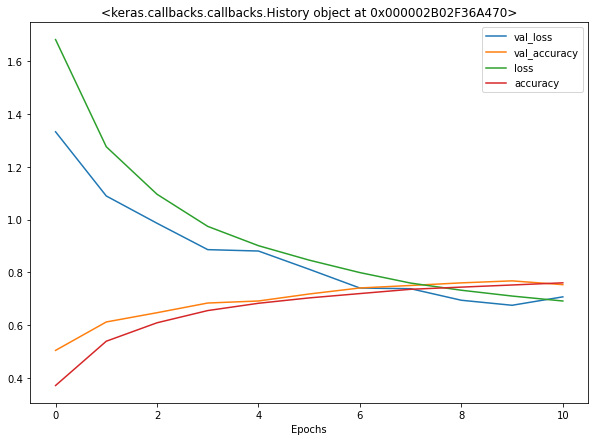

In [37]:
view_performance(history_aug)

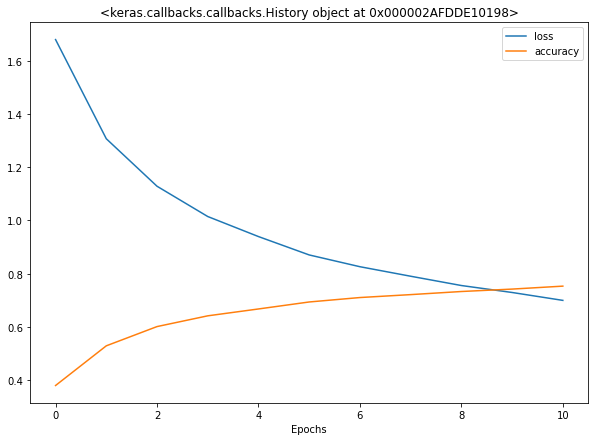

In [38]:
view_performance(history_dropout)

We were not able to achieve a 90% accuracy on CIFAR-10 as we had hoped for, what do I need to learn that will take my learning to the next level? How can I improve my understanding of the machine learning process? What project can I do next that will force me to learn and also be resume worthy?